In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [5]:

"""
generate simple linear data use sklearn built-in generator.
generate linear regression data
noise: control the discrete of data
n_features: the shape of X
"""
X, y = make_regression(n_samples=100,n_features=1,random_state=0,
                       noise=10.0,bias=2.0)

print('shape of y:', y.shape)

shape of y: (100,)


In [6]:
reshaped_y = y.reshape((y.shape[0],1))
train_X,test_X, train_y, test_y =\
train_test_split(X, reshaped_y, test_size=0.2, random_state=0)

linear_regression = LinearRegression()
linear_regression.fit(train_X, train_y)
predict = linear_regression.predict(test_X)

score = linear_regression.score(train_X, train_y)
print('Accuracy:', score)

Accuracy: 0.9422547687768377


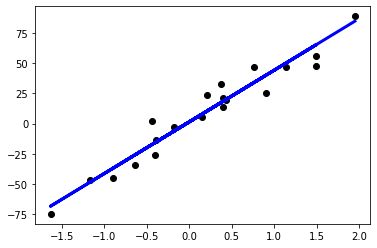

In [7]:
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, predict, color='blue', linewidth=3)

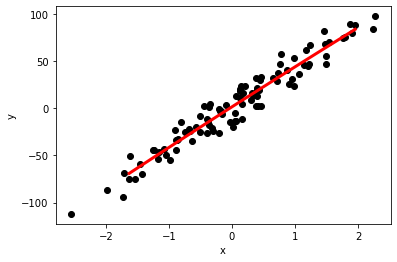

Model Accuracy:  0.9423618281919504    0.9386346458965696


In [8]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(np.array(train_X), train_y)
p_pred=pipeline.predict(test_X)
df = pd.DataFrame({'x': test_X[:,0], 'y': p_pred[:,0]})
values = df.sort_values(by='x', inplace=True)

points = pd.DataFrame(df).to_numpy()

plt.plot(points[:, 0], points[:, 1],color="red", linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,y, color="black")
plt.show()

accuracy_score_train = pipeline.score(train_X,train_y)
accuracy_score_test = pipeline.score(test_X,test_y)
print('Model Accuracy: ', accuracy_score_train, '  ', accuracy_score_test)